# Projet Machine Learning


Le projet de ce module vise à améliorer l'évaluation des essais étudiants en utilisant le Machine Learning et le Traitement du Langage Naturel, en développant des modèles capables d'évaluer automatiquement les essais des étudiants, réduisant ainsi la nécessité de notation manuelle et le temps associé. 

Pour ce faire,  les étapes clés incluent la compréhension des données, l'exploration des données, l'entraînement des modèles, l'évaluation des performances, l'interprétation des résultats, et enfin, la sélection du meilleur modèle. Une documentation détaillée est attendue pour expliquer chaque étape du processus.

## Importation des Librairies pour Répondre au Besoin
Nous importons en premier nos libraires nécéssaires pour repondre au besoin


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer,  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import numpy as np
from sklearn.metrics import *
from skimpy import skim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import seaborn as sns

## Lecture et compréhension des données

Nous commençons par charger nos données à partir d'un fichier CSV.

In [2]:

df = pd.read_csv('../data/train.csv')
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


Nous examinons les premières lignes à l'aide de df.head() pour comprendre la structure des données. 

In [3]:
df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3



Nous remarquons que notre ensemble de données comprend uniquement trois colonnes : une colonne pour l'identifiant de l'essaie, une colonne "full_text" représentant l'essai de l'étudiant, et enfin une colonne représentant le "score" ou la note attribuée à cet essai, qui est notre variable cible. Ainsi, notre objectif est d'utiliser la colonne "full_text" comme nos caractéristiques (X) que nous pouvons exploiter pour créer un modèle capable de prédire notre variable cible (Y), qui est le score.

In [4]:
X = df["full_text"]
X

0        Many people have car where they live. The thin...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus, the planet without a...
4        Dear, State Senator\r\n\r\nThis is a letter to...
                               ...                        
17302    the story " The Challenge of Exploing Venus " ...
17303    Technology has changed a lot of ways that we l...
17304    If you don't like sitting around all day than ...
17305    In "The Challenge of Exporing Venus," the auth...
17306    Venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

In [5]:
y = df["score"]
y

0        3
1        3
2        4
3        4
4        3
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 17307, dtype: int64

Nous cherchons maintenant de comprendre plus notre dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


In [7]:
df.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17307  │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd   ┃ p0   ┃ p25    ┃ p50    ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ score              │    0 │       0 │     2.9 │    1 │    1 │      2 │      3 │     4 │       6 │  ▂▆▇▅▁   │  │
│ └────────────────────┴──────┴─────────┴─────────┴──────┴──────┴────────┴────────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ essay_id                  │       0 │          0 │                            1 │                    17307 │  │
│ │ full_text                 │       0 │          0 │                          380 │                  6643794 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Maintenant, on essaye d'observer si le nombre d'occurences des mots dans les paragraphes est equitable. Voici un nuage e mots qu'il illustre les mots les plus fréquntés.

On peut remarquer que il ya des mots qu'ils sont beaucoup plus frequent que d'autres comme : "people", "car", "think", "driver", "less", "technology", ...

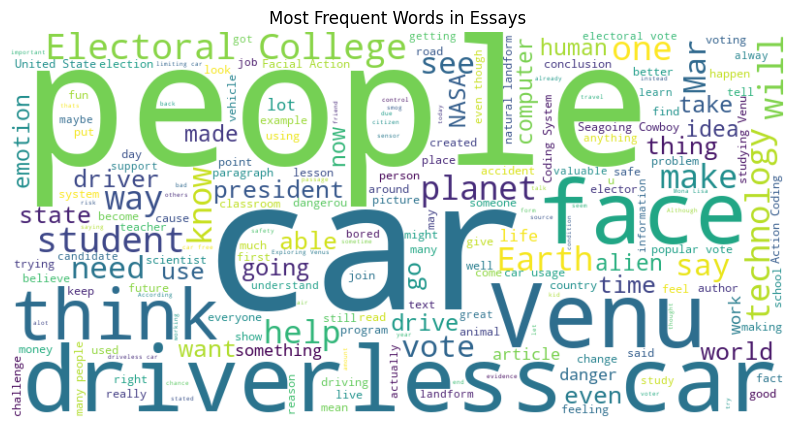

In [9]:


# Assuming your column containing paragraphs is named 'full_text'
text = ' '.join(df['full_text'])  # Concatenate all paragraphs into a single string

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Essays')
plt.show()

D'une maniere général, nous pouvons observer que notre ensemble de données comprend un total de 6,6 millions de mots répartis sur 17 000 exemples, ce qui équivaut à environ 380 mots par exemple. Cette quantité considérable nécessite l'utilisation d'approches de NLP telles que "tf-idf" et "bag of words" pour donner un sens à ces paragraphes en les vectorisant (tokenization). Ainsi, pour chaque exemple, nous obtiendrons un vecteur significatif qui peut être utilisé pour entraîner des modèles de machine learning dans la partie de selection de modele.




Maintenant, sachant que notre variable cible (Y) représente le score et est un entier, nous aimerions connaître la distribution des valeurs dans cette colonne.

In [10]:
y.nunique()

6

In [11]:
y.value_counts()

score
3    6280
2    4723
4    3926
1    1252
5     970
6     156
Name: count, dtype: int64


Nous pouvons conclure que nous avons 6 valeurs de score réparties en 6 classes attendues. Ainsi, il s'agit d'un problème de classification multi-classe.

## Exploration et transformation des données


Comme mentionné précédemment, afin d'obtenir un résultat de notre modèle, nous effectuons quelques prétraitements sur nos données textuelles.

- Tokenisation : Le texte est divisé en mots individuels.
- Suppression des mots vides : Les mots vides (stop words) de l'anglais sont retirés.
- Racinisation (Stemming) : Chaque mot est réduit à sa forme racine à l'aide de l'algorithme Porter Stemmer.
- Reconstitution du texte : Les mots racinisés sont réunis pour former une phrase cohérente.

On arrivera a la fin a une liste d'entrée ou chaque entrée represente un texte prétraitée de l'essaie apres avoir supprimer les mots vides et réduiser les mots à leur forme racine.

In [12]:
X

0        Many people have car where they live. The thin...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus, the planet without a...
4        Dear, State Senator\r\n\r\nThis is a letter to...
                               ...                        
17302    the story " The Challenge of Exploing Venus " ...
17303    Technology has changed a lot of ways that we l...
17304    If you don't like sitting around all day than ...
17305    In "The Challenge of Exporing Venus," the auth...
17306    Venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

In [13]:


# Initialize the PorterStemmer
stemmer =  PorterStemmer()

def preprocess_text(text):
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a sentence
    stemmed_text = " ".join(stemmed_words)
    
    return stemmed_text

X = X.apply(preprocess_text)
X


0        mani peopl car live . thing n't know use car a...
1        scientist nasa discuss `` face '' mar . explai...
2        peopl alway wish technolog seen movi , best ne...
3        heard venu , planet without almost oxygen eart...
4        dear , state senat letter argu favor keep elec...
                               ...                        
17302    stori `` challeng explo venu `` inform piec da...
17303    technolog chang lot way live today . nowaday p...
17304    n't like sit around day great opportun partici...
17305    `` challeng expor venu , '' author suggest stu...
17306    venu worthi place studi danger . reaosn thei c...
Name: full_text, Length: 17307, dtype: object

In [14]:
X.shape

(17307,)

Nous avons remarqué auparavant que le problème peut être résolu en utilisant des méthodes de NLP telles que TF-IDF et le sac de mots (ou bag of words) pour donner un sens réel à nos essais. Ainsi, nous allons tester les deux méthodes de vectorisation et déterminer laquelle offre de meilleurs résultats que l'autre lors du choix du modèle.

### Bag of words 


La méthode de vectorisation Bag of Words (BoW) en NLP consiste à représenter un document textuel sous forme d'un vecteur où chaque élément correspond à la fréquence d'un mot dans le document. Cette approche ignore l'ordre des mots dans le texte et ne prend en compte que leur présence. Ainsi, chaque document est représenté par un vecteur de longueur égale au nombre total de mots dans le vocabulaire, où chaque élément du vecteur correspond à la fréquence du mot correspondant dans le document. Cette représentation permet de transformer des données textuelles en données numériques exploitables par les modèles de machine learning.

Afin de réduire la dimension des vecteurs, nous avons opté pour la conservation des 5000 features les plus significatives lors de notre vectorisation. Cependant, il est important de ne pas perdre d'informations pertinentes pour notre choix. Si nous choisissons un nombre très restreint de features, nous risquons de manquer des informations qui pourraient contribuer à améliorer les performances de notre modèle.

In [15]:

vectorizer = TfidfVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(X).toarray()
vectors.shape



(17307, 5000)

Lorsque nous traitons des données de grande dimension comme un vecteur de shape (17307, 5000), il devient crucial de réduire la dimension de ces données pour rendre l'entraînement et la prédiction de résultats plus rapides et plus abordables d'ou l'importance d'utiliser les PCAs

#### PCA ( Analyse en Composantes Principale )
L'Analyse en Composantes Principales (PCA) est une technique de réduction de dimension utilisée pour explorer et visualiser des ensembles de données complexes. Elle consiste à projeter les données dans un nouvel espace de dimensions inférieures, tout en conservant autant que possible la variance des données d'origine

Avant de procéder aux PCA , il est important de normaliser les données contenues dans le tableau vectors. La normalisation est une étape importante dans le prétraitement des données, car elle permet de mettre toutes les caractéristiques à la même échelle, ce qui est souvent nécessaire pour améliorer les performances des modèles d'apprentissage automatique. 

In [16]:


scaler = StandardScaler()

vectors_modified = scaler.fit_transform(vectors)

vectors_modified

array([[-0.04393119,  3.23996007, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503],
       [-0.04393119, -0.16487696, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503],
       [-0.04393119, -0.16487696, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503],
       ...,
       [-0.04393119, -0.16487696, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503],
       [-0.04393119, -0.16487696, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503],
       [-0.04393119, -0.16487696, -0.15239779, ..., -0.1706145 ,
        -0.05654221, -0.08259503]])

Maintenant, nous effectuons une réduction de dimension sur les données normalisées auparavant. Nous indiquons à PCA de réduire la dimension à 100 composants principaux. Ensuite, PCA ajuste le modèle aux données normalisées et transforme ces données en utilisant les composants principaux calculés. Ce choix de 100 composants a été fait après plusieurs essais pour obtenir de bons scores des modèles testés par la suite.

In [17]:
pca = PCA(n_components=100)

X = pca.fit_transform(vectors_modified)

X.shape

(17307, 100)

## Entrainement des modeles et sélection d'un modele

la phase d'entraînement des modèles et de sélection d'un modèle finale est une étape cruciale dans le processus de construction d'un système d'apprentissage automatique. Dans cette phase, plusieurs modèles sont entraînés sur les données d'entraînement afin de les rendre capables de généraliser à de nouvelles données. Différents algorithmes peuvent être explorés, chacun ayant ses propres forces et faiblesses. Une fois les modèles entraînés, une évaluation est effectuée pour mesurer leurs performances. 

Des métriques telles que l'accuracy, la précision, le rappel et le score F1 sont utilisées pour évaluer la qualité des prédictions. Enfin, le modèle offrant les meilleures performances est sélectionné pour être déployé sur de nouvelles données. Cette phase nécessite souvent des ajustements et des itérations pour trouver le modèle optimal en fonction des besoins spécifiques du problème.








D'abord , Nous divisons les données en un ensemble d'entraînement (X_train, y_train) et un ensemble de test (X_test, y_test) en utilisant la fonction train_test_split de scikit-learn. Les données sont divisées de telle sorte que 80% sont utilisées pour l'entraînement et 20% pour les tests

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(13845, 100)

In [20]:
X_test.shape

(3462, 100)

Maintenant, nous savons que nous disposons d'une liste exhaustive des modèles de classification disponibles. Voici une brève description de chacun des modèles de machine learning que nous avons sélectionnés pour notre entraînement :

**Logistic Regression (Régression Logistique)** :

La régression logistique est un modèle utilisé pour la classification binaire et multiclasse.
Elle modélise la probabilité qu'une observation appartienne à une classe particulière.
Elle est basée sur la fonction logistique pour estimer les probabilités.

**Support Vector Machine (SVM)** :

Les machines à vecteurs de support sont utilisées pour la classification et la régression.
Elles trouvent un hyperplan qui sépare de manière optimale les données en différentes classes.
En classification, elles maximisent la marge entre les classes.

**Random Forest Classifier (Forêts aléatoires)** :

Les forêts aléatoires sont des ensembles d'arbres de décision.
Chaque arbre est construit sur un sous-ensemble aléatoire des données et des fonctionnalités.
Ils combinent les prédictions de plusieurs arbres pour améliorer la précision et réduire le surajustement.

**Gradient Boosting Classifier (Gradient Boosting)** :

Le boosting par gradient est une technique d'apprentissage ensembliste pour la classification et la régression.
Il construit des modèles d'arbre de décision séquentiels, chaque arbre corrigeant les erreurs des prédictions précédentes.
Il est efficace pour les problèmes de classification et de régression, mais peut être plus sensible au surajustement.

**MLP Classifier (Réseau de Neurones Multicouche)** :

Le MLP Classifier, abréviation de Multi-Layer Perceptron Classifier, est un type de réseau de neurones artificiels utilisé pour la classification.
Il est composé de plusieurs couches de neurones, y compris une couche d'entrée, une ou plusieurs couches cachées et une couche de sortie.
Chaque neurone dans les couches cachées utilise une fonction d'activation pour combiner les entrées et produire une sortie.
Il est capable de capturer des relations complexes entre les caractéristiques, mais peut être plus sujet au surajustement et nécessite souvent un réglage fin des hyperparamètres.





Nous itérons à travers chaque modèle de la liste, les entraînons sur les données d'entraînement, effectuons des prédictions sur les données de test et calculons différentes mesures de performance telles que l'accuracy, la précision, le recall et le F1-score. Ensuite, pour chaque modèle, nous générons la matrice de confusion. Les résultats de chaque mesure de performance sont stockés dans des listes distinctes pour permettre une comparaison ultérieure.

In [21]:


# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('MLP Classifier', MLPClassifier(max_iter=1000))
]

accuracies = []
precisions = []
recalls = []
f1s =  []
conf_matrixs = []
execution_times = []


# Train and evaluate each model
for model in models:
    start_time = time.time()
    print(f"{model[0]} ")
    model[1].fit(X_train, y_train)
    end_time = time.time()

    execution_times.append(end_time - start_time)
    y_pred = model[1].predict(X_test)


    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precisions.append(precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recalls.append(recall)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1s.append(f1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrixs.append(conf_matrix)

warnings.filterwarnings("ignore")

Logistic Regression 
Support Vector Machine 


c:\Users\keske\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier 


c:\Users\keske\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Classifier 


Voici un diagramme comparative de tous les metrics calculés par les modeles auparavant ( precision , recall, accuracy et f1-score)

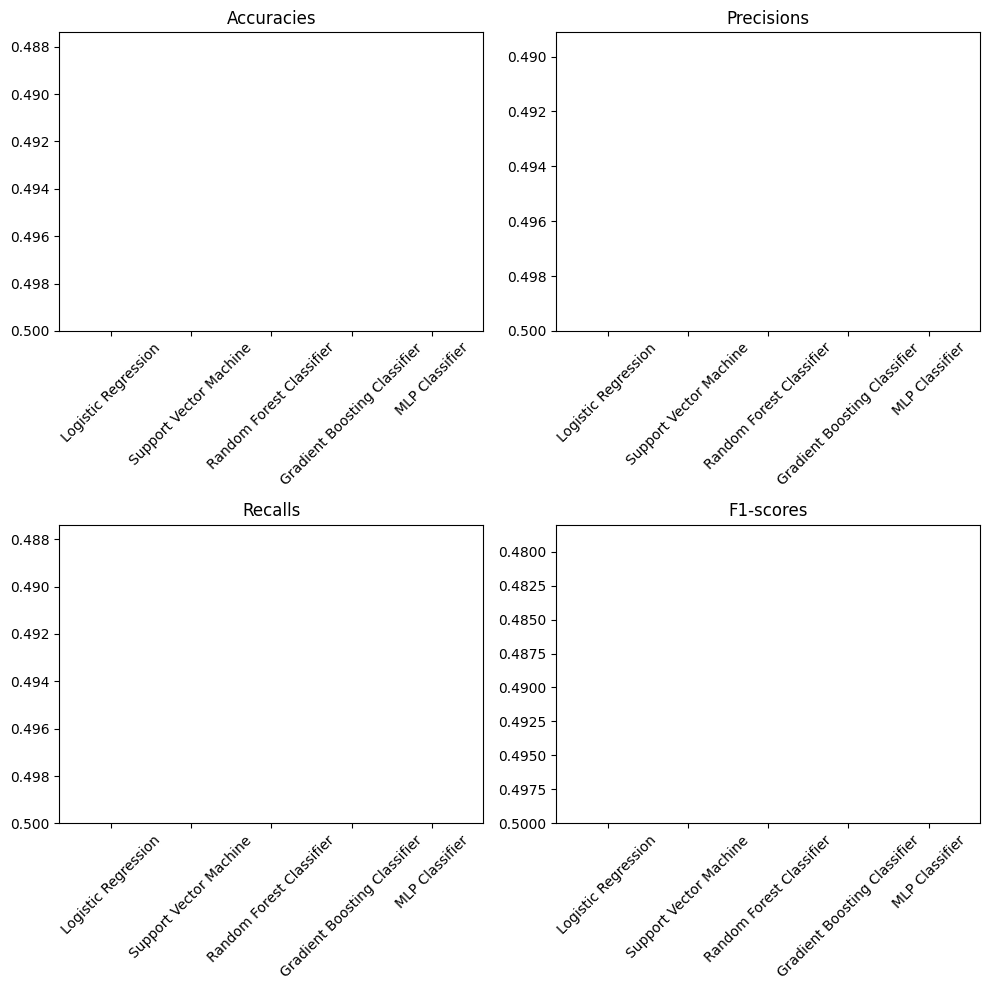

In [ ]:
# Plot comparatif des accuracies, precisions, recalls, f1-scores
plt.figure(figsize=(10, 10))

# Accuracies
plt.subplot(2, 2, 1)
plt.bar(range(len(models)), accuracies, color='b', alpha=0.6)
plt.xticks(range(len(models)), [model[0] for model in models], rotation=45)
plt.ylim(0.5)
plt.title('Accuracies')

# Precisions
plt.subplot(2, 2, 2)
plt.bar(range(len(models)), precisions, color='g', alpha=0.6)
plt.xticks(range(len(models)), [model[0] for model in models], rotation=45)
plt.ylim(0.5)
plt.title('Precisions')

# Recalls
plt.subplot(2, 2, 3)
plt.bar(range(len(models)), recalls, color='r', alpha=0.6)
plt.xticks(range(len(models)), [model[0] for model in models], rotation=45)
plt.ylim(0.5)
plt.title('Recalls')

# F1-scores
plt.subplot(2, 2, 4)
plt.bar(range(len(models)), f1s, color='y', alpha=0.6)
plt.xticks(range(len(models)), [model[0] for model in models], rotation=45)
plt.ylim(0.5)
plt.title('F1-scores')

plt.tight_layout()
plt.show()

Voici un diagramme comparative de temps d'execution de tous les modeles 

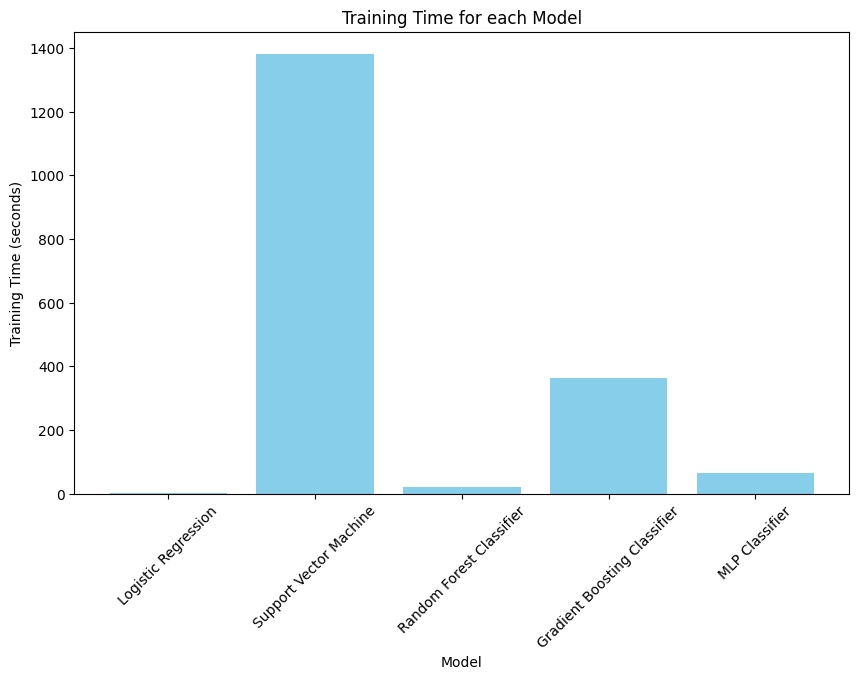

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar([model[0] for model in models], execution_times, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for each Model')
plt.xticks(rotation=45)
plt.show()

Et enfin, voici la matrice de confusion de chaque modele 

In [ ]:
conf_matrixs

[array([[ 84, 121,  48,   7,   0,   0],
        [ 42, 456, 419,  47,   1,   0],
        [ 32, 303, 746, 176,   7,   1],
        [  2,  49, 392, 285,  20,   2],
        [  0,   0,  47, 100,  30,   6],
        [  0,   0,   3,  19,  11,   6]], dtype=int64),
 array([[ 57, 148,  49,   6,   0,   0],
        [ 22, 439, 459,  45,   0,   0],
        [ 21, 276, 790, 178,   0,   0],
        [  1,  46, 422, 278,   0,   3],
        [  0,   0,  54, 128,   0,   1],
        [  0,   0,   3,  32,   0,   4]], dtype=int64),
 array([[ 51, 153,  52,   4,   0,   0],
        [ 20, 437, 459,  49,   0,   0],
        [ 16, 284, 776, 189,   0,   0],
        [  1,  58, 417, 270,   4,   0],
        [  0,   2,  50, 121,  10,   0],
        [  0,   0,   5,  26,   8,   0]], dtype=int64),
 array([[ 69, 142,  46,   2,   0,   1],
        [ 34, 459, 436,  33,   1,   2],
        [ 27, 284, 759, 185,   7,   3],
        [  3,  65, 370, 285,  24,   3],
        [  0,   0,  45, 104,  28,   6],
        [  0,   0,   4,  21,  10,  

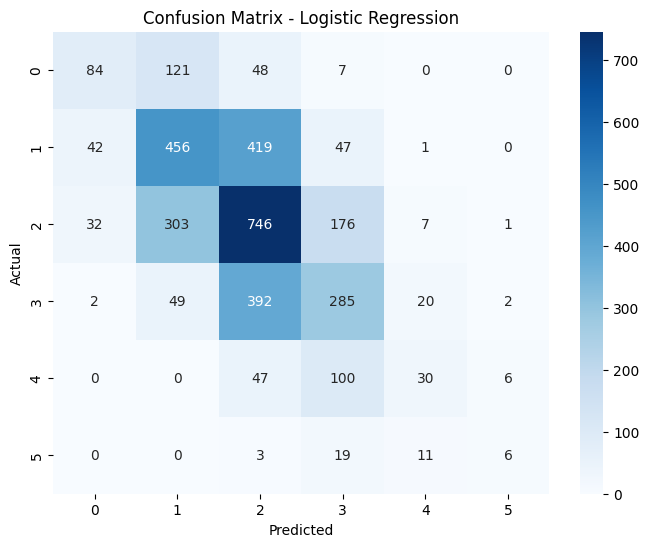

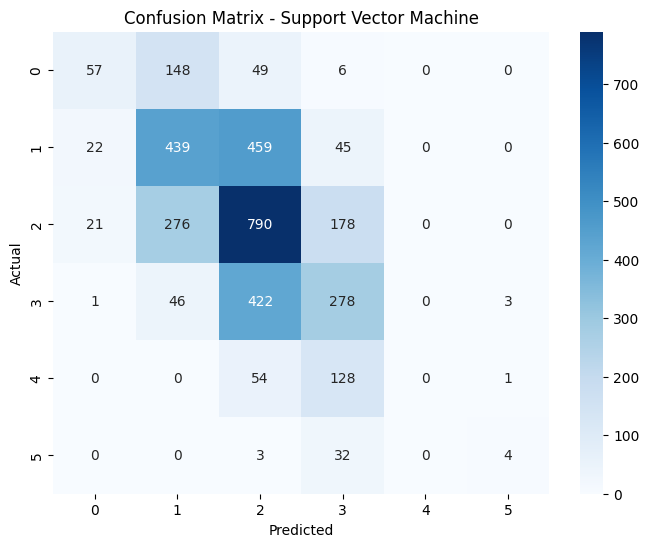

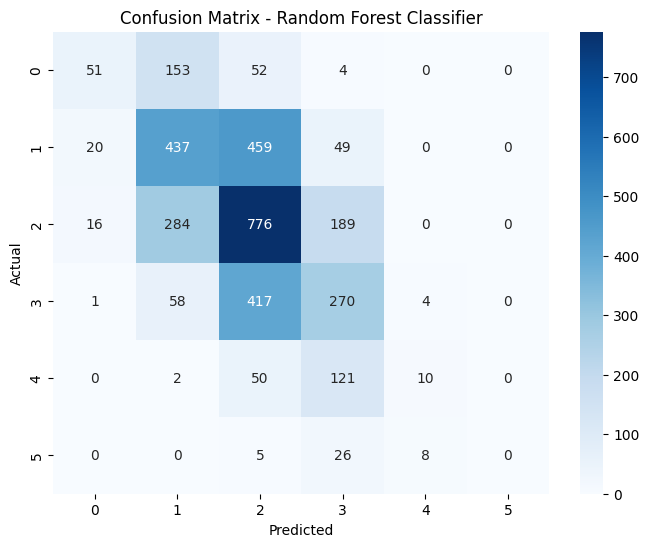

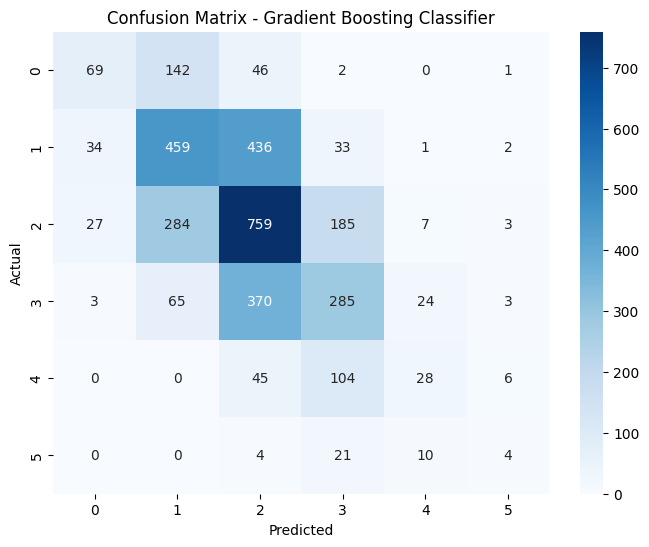

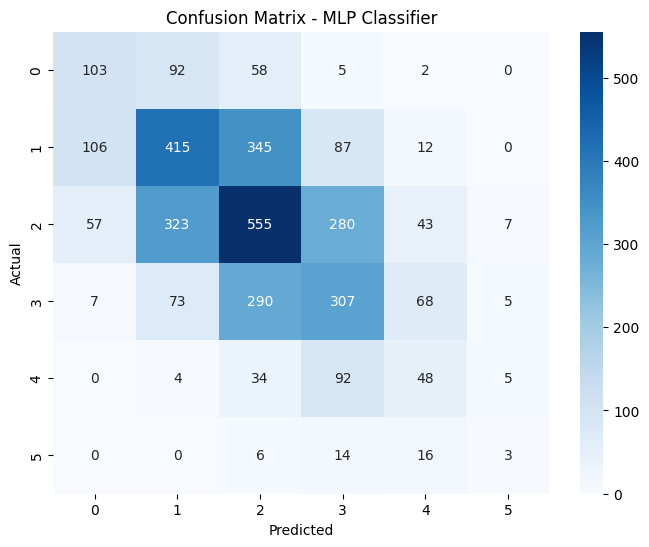

In [ ]:
# Noms des modèles
model_names = [name for name, _ in models]

# Plot des heatmaps
for matrix, name in zip(conf_matrixs, model_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

## Selection du modele avec les meilleurs performances 



Après avoir entraîné plusieurs modèles sur nos données, notre choix de sélection du modèle est basé sur une analyse des différentes mesures de performance, notamment l'accuracy, la précision, le recall et le F1-score. En examinant ces métriques pour chaque modèle, nous avons constaté que les deux modèles les plus performants étaient la régression logistique et la machine à vecteurs de support (SVM), avec une accuracy d'environ 61%, légèrement plus élevée que les autres modèles. Les autres métriques de performance, comme la précision, le recall et le F1-score, étaient également tous autour de 60%. De plus, en observant leurs matrices de confusion, nous avons remarqué que celles-ci semblaient plus stables et significatives pour ces deux modèles. La principale différence entre ces deux modèles était le temps d'exécution, où la régression logistique s'est avérée beaucoup plus rapide que le SVM. En résumé, compte tenu de leurs performances globalement similaires et du temps d'exécution plus court de la régression logistique, nous choisirions ce modèle pour notre tâche de classification.

In [ ]:
chosen_model = models[0][1]
# chosen_model = LogisticRegression(max_iter=1000)

Pour confirmer la qualité de notre choix de modèle et garantir une estimation plus précise de sa performance, nous avons décidé d'ajouter une étape de validation croisée.
Les K-Folds sont une technique utilisée en apprentissage automatique pour évaluer la performance d'un modèle.

Le principe est de diviser le jeu de données en K parties égales, appelées "plis" (folds). Ensuite, le modèle est entraîné K fois, chaque fois en utilisant K-1 plis comme données d'entraînement et le pli restant comme données de test. Ainsi, chaque pli est utilisé comme données de test exactement une fois.

In [ ]:

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(chosen_model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(chosen_model, X, y, cv=kf, scoring='precision_weighted')
recall_scores = cross_val_score(chosen_model, X, y, cv=kf, scoring='recall_weighted')
f1_scores = cross_val_score(chosen_model, X, y, cv=kf, scoring='f1_weighted')

# Print average scores
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-score:", np.mean(f1_scores))

Average Accuracy: 0.46385821644532604
Average Precision: 0.4647277197801699
Average Recall: 0.46385821644532604
Average F1-score: 0.4542846299852693
